<a href="https://colab.research.google.com/github/CarlosQuixada/Analise_Airbnb_Toquio/blob/dev/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Sua Cidade*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade ________, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


Dados utilizados 20-07-2021

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importar os pacotes necessarios
import pandas as pd

In [5]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('drive/MyDrive/Analise_Airbnb/listings.csv')

(10760, 16)

## Análise dos Dados


**Dicionário das variáveis**

* ...
* ... 
* ...

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [6]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71707,139.82608,Entire home/apt,16000,3,165,2019-11-14,1.54,1,363
1,776070,Kero-kero house room 1,801494,Kei,NaN,Kita Ku,35.73844,139.76917,Private room,7676,3,228,2020-01-18,2.39,1,144
2,1033276,private room @Senju area,5686404,Yukiko,NaN,Adachi Ku,35.74437,139.79739,Private room,30000,1,72,2018-04-15,0.80,2,270
3,1096292,Home stay with a Japanese language teacher fam...,6018145,Mari,NaN,Shinjuku Ku,35.69233,139.70851,Private room,11312,1,252,2020-02-12,2.80,3,365
4,1196177,Stay with host Cozy private room Senju area,5686404,Yukiko,NaN,Adachi Ku,35.74475,139.79731,Private room,3000,2,95,2020-03-17,1.01,2,88


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [13]:
# identificar o volume de dados do DataFrame
print(f"Quantidade de Registros: {df.shape[0]}")
print(f"Quantidade de Colunas: {df.shape[1]}")

# verificar as 5 primeiras entradas do dataset
print("\n")
print(df.dtypes)

Quantidade de Registros: 10760
Quantidade de Colunas: 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [16]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
df.isnull().sum().sort_values(ascending=False)*100/df.shape[0]

neighbourhood_group               100.000000
reviews_per_month                  18.791822
last_review                        18.791822
host_name                           0.148699
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
name                                0.000000
id                                  0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

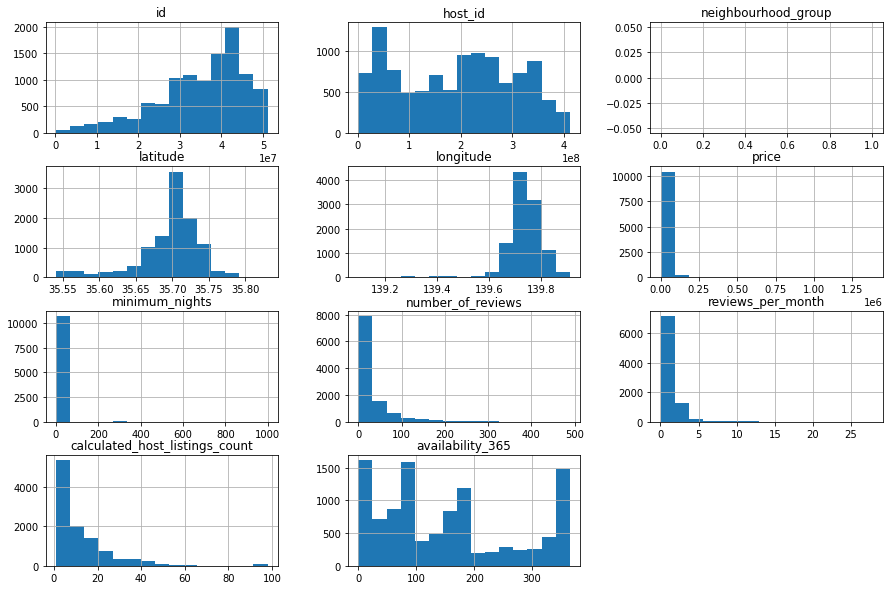

In [32]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [21]:
# ver a média da coluna `price``
df['price'].mean()

21513.449535315984

### **Q4. Qual a correlação existente entre as variáveis**

In [34]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.020566,-0.044601,-0.023037,0.128283,-0.009837
minimum_nights,-0.020566,1.000000,-0.036336,-0.040912,0.057085,0.074359
number_of_reviews,-0.044601,-0.036336,1.000000,0.652700,-0.157762,0.013804
reviews_per_month,-0.023037,-0.040912,0.652700,1.000000,-0.125297,-0.001162
calculated_host_listings_count,0.128283,0.057085,-0.157762,-0.125297,1.000000,0.146371
availability_365,-0.009837,0.074359,0.013804,-0.001162,0.146371,1.000000


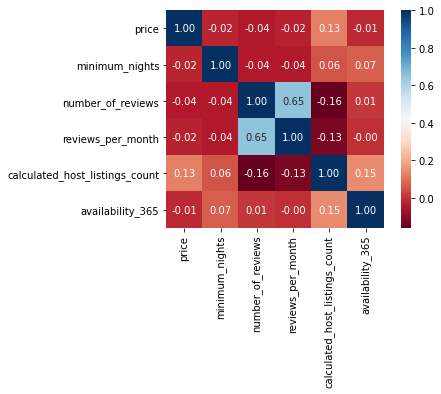

In [35]:
# plotar um heatmap a partir das correlações
import seaborn as sns
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [22]:
# mostrar a quantidade de cada tipo de imóvel disponível
df['room_type'].value_counts()

Entire home/apt    7447
Private room       2546
Shared room         401
Hotel room          366
Name: room_type, dtype: int64

In [23]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df['room_type'].value_counts()*100/df.shape[0]

Entire home/apt    69.210037
Private room       23.661710
Shared room         3.726766
Hotel room          3.401487
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [25]:
# ver preços por bairros, na média
tmp = df.groupby(['neighbourhood'])['price'].mean()
tmp.sort_values(ascending=False)

neighbourhood
Chiyoda Ku             67661.977401
Minato Ku              63586.954348
Hinohara Mura          40696.500000
Edogawa Ku             39643.562874
Chuo Ku                39226.779661
Nakano Ku              25136.287671
Akiruno Shi            22734.153846
Shinagawa Ku           22544.104265
Hamura Shi             22087.000000
Shibuya Ku             21842.129252
Toshima Ku             21702.276971
Komae Shi              21142.750000
Shinjuku Ku            19863.887552
Meguro Ku              18698.576923
Mitaka Shi             17998.000000
Chofu Shi              17409.928571
Setagaya Ku            16727.799296
Itabashi Ku            16535.620690
Arakawa Ku             16396.788991
Taito Ku               16167.575205
Nishitokyo Shi         15931.473684
Suginami Ku            14901.399061
Kita Ku                14776.472656
Katsushika Ku          14751.724638
Musashino Shi          14517.428571
Sumida Ku              13885.220290
Kokubunji Shi          13584.666667
Ota Ku        

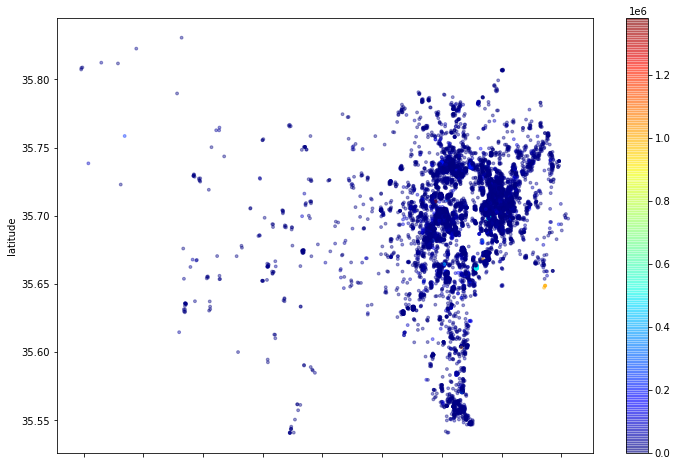

In [29]:
import matplotlib.pyplot as plt
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [30]:
# ver a média da coluna `minimum_nights``
df['minimum_nights'].mean()

3.5310408921933085

## Conclusões
